In [1]:
import os

import pandas as pd
import numpy as np

from main import load_datasets, FeverLoader, PubhealthLoader, ClimateFeverLoader

/scratch/users/k21193529/conda/jenv3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load Data

In [2]:
root = '../data_2023_06_02'

fever_dir = os.path.join(root, 'preprocessed/FEVER')
pubhealth_dir = os.path.join(root, 'preprocessed/PUBHEALTH')
climate_dir = os.path.join(root, 'preprocessed/CLIMATE-FEVER')

In [3]:
fever_train_ds, fever_dev_ds, fever_test_ds = FeverLoader.load(fever_dir)
pubhealth_train_ds, pubhealth_dev_ds, pubhealth_test_ds = PubhealthLoader.load(pubhealth_dir)

climate_params = {
    'dev_size': 200,
    'test_size': 200,
    'random_state': 392
}

climate_train_ds, climate_dev_ds, climate_test_ds = ClimateFeverLoader.load(climate_dir, climate_params)

### Load into dataframe

In [4]:
fever_train_df = pd.DataFrame(fever_train_ds)
fever_dev_df = pd.DataFrame(fever_dev_ds)
fever_test_df = pd.DataFrame(fever_test_ds)

In [5]:
pub_train_df = pd.DataFrame(pubhealth_train_ds)
pub_dev_df = pd.DataFrame(pubhealth_dev_ds)
pub_test_df = pd.DataFrame(pubhealth_test_ds)

In [6]:
climate_train_df = pd.DataFrame(climate_train_ds)
climate_dev_df = pd.DataFrame(climate_dev_ds)
climate_test_df = pd.DataFrame(climate_test_ds)

In [7]:
#combine into a single df

fever_train_df['set'] = 'train'
fever_dev_df['set'] = 'validation'
fever_test_df['set'] = 'test'
fever_df = pd.concat([fever_train_df, fever_dev_df, fever_test_df])

In [8]:
pub_train_df['set'] = 'train'
pub_dev_df['set'] = 'validation'
pub_test_df['set'] = 'test'
pub_df = pd.concat([pub_train_df, pub_dev_df, pub_test_df])

In [9]:
climate_train_df['set'] = 'train'
climate_dev_df['set'] = 'validation'
climate_test_df['set'] = 'test'
climate_df = pd.concat([climate_train_df, climate_dev_df, climate_test_df])

In [10]:
print(fever_df.shape, pub_df.shape, climate_df.shape)

(165447, 4) (10452, 4) (1381, 4)


### Run statistics on claims

In [11]:
fever_df['claim_length'] = fever_df['claim'].apply(lambda x: len(x.split()))
pub_df['claim_length'] = pub_df['claim'].apply(lambda x: len(x.split()))
climate_df['claim_length'] = climate_df['claim'].apply(lambda x: len(x.split()))

In [15]:
fever_df['data'] = "FEVER"
pub_df['data'] = "PUBHEALTH"
climate_df['data'] = "CLIMATE-FEVER"
df = pd.concat([fever_df, pub_df, climate_df])

In [13]:
import seaborn as sns

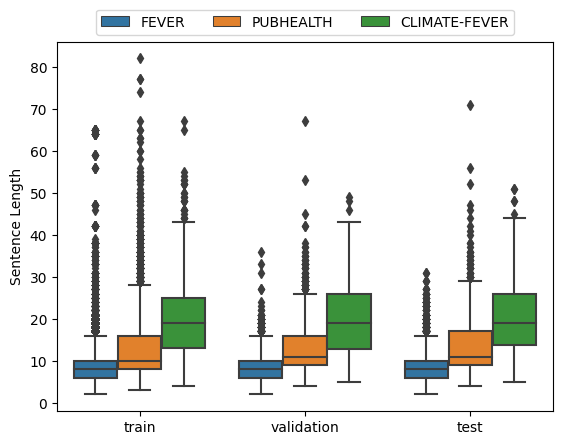

In [16]:
ax = sns.boxplot(data=df, x="set", y="claim_length", hue="data")

ax.set_xlabel(None)
ax.set_ylabel("Sentence Length")
sns.move_legend(
    ax, "lower center",
    ncol=3, title=None, frameon=True,
    bbox_to_anchor=(0.5, 1)
)

ax.figure.savefig("token_length_boxplot.png")

In [17]:
df.groupby(['set','data'])['claim_length'].describe()

count       mean       std  min    25%   50%  \
set        data                                                             
test       CLIMATE-FEVER     200.0  20.475000  9.970276  5.0  13.75  19.0   
           FEVER            9999.0   8.498750  3.312970  2.0   6.00   8.0   
           PUBHEALTH        1032.0  13.692829  7.469929  4.0   9.00  11.0   
train      CLIMATE-FEVER     981.0  20.189602  9.551831  4.0  13.00  19.0   
           FEVER          145449.0   8.101389  3.205078  2.0   6.00   8.0   
           PUBHEALTH        8370.0  13.294146  7.501590  3.0   8.00  10.0   
validation CLIMATE-FEVER     200.0  20.150000  9.559520  5.0  12.75  19.0   
           FEVER            9999.0   8.169217  2.976599  2.0   6.00   8.0   
           PUBHEALTH        1050.0  13.158095  6.988057  4.0   9.00  11.0   

                           75%   max  
set        data                       
test       CLIMATE-FEVER  26.0  51.0  
           FEVER          10.0  31.0  
           PUBHEALTH      17.0  71.0  
train      CLIMATE-FEVER  25.0  67.0  
           FEVER          10.0  65.0  
           PUBHEALTH      16.0  82.0  
validation CLIMATE-FEVER  26.0  49.0  
           FEVER          10.0  36.0  
           PUBHEALTH      16.0  67.0

## Get samples

In [67]:
def list_claims(df):
    for idx, row in df.iterrows():
        print(row['claim'], ':', idx)

In [81]:
df.reset_index(drop=True, inplace=True)

In [82]:
df.head()

,claim,label,evidence,set,claim_length,data
0,Nikolaj Coster-Waldau worked with the Fox Broa...,SUPPORTS,He then played Detective John Amsterdam in the...,train,8,FEVER
1,Roman Atwood is a content creator.,SUPPORTS,"He is best known for his vlogs , where he post...",train,6,FEVER
2,"History of art includes architecture, dance, s...",SUPPORTS,The subsequent expansion of the list of princi...,train,18,FEVER
3,Adrienne Bailon is an accountant.,REFUTES,Adrienne Eliza Houghton -LRB- née Bailon ; bor...,train,5,FEVER
4,System of a Down briefly disbanded in limbo.,NOT ENOUGH INFO,Paul Hood D.D. -LRB- died 2 August 1668 -RRB- ...,train,8,FEVER


In [32]:
df.query(
    "data == 'FEVER' &\
    label == 'REFUTES'"
).iloc[124].to_dict()

{'claim': 'Jordan Knight is the lead singer of a band.',
 'label': 'SUPPORTS',
 'evidence': 'Jordan Nathaniel Marcel Knight -LRB- born May 17 , 1970 -RRB- is an American singer-songwriter and actor , best known as the lead singer of the boy band New Kids on the Block -LRB- NKOTB -RRB- , who rose to fame in the 1980s and 1990s .',
 'set': 'train',
 'claim_length': 9,
 'data': 'FEVER'}

In [70]:
df.query(
    "data == 'PUBHEALTH' &\
    label == 'SUPPORTS' & \
    claim_length > 15"
).iloc[66].to_dict()

{'claim': '\xa0Dimethylpolysiloxane is used in silicone caulks and adhesives — as well   as in McDonald’s fries and other menu options at chain restaurants   across the country.',
 'label': 'SUPPORTS',
 'evidence': 'It concluded:  “Studies have been carried out on silicone fluids with and without the addition of silica. Short-term studies have been carried out in several species, including one study on an emulsion of dimethylpolysiloxane. The   move was requested by the Dow Corning Corporation, which  describes itself as a “global leader in silicon-based technology and innovation.” The FDA placed a number of  limitations on the use of dimethylpolysiloxane as a “secondary direct food additive” for human consumption:  “Limitations: 10 parts per million in food, or at such level in a  concentrated food that when prepared as directed on the\xa0labels, the food in its ready-for-consumption state will have not more than 10 parts per million except as\xa0follows: Zero in milk; 110 parts per m

In [50]:
df.query(
    "data == 'CLIMATE-FEVER' &\
    label == 'SUPPORTS' & \
    claim_length > 15"
).iloc[44].to_dict()

{'claim': '‘With levels of carbon dioxide in the atmosphere consistently breaking new records, the influence of human activities on the climate system has become more and more evident,’ said Taalas.',
 'label': 'SUPPORTS',
 'evidence': 'While CO 2 absorption and release is always happening as a result of natural processes, the recent rise in CO 2 levels in the atmosphere is known to be mainly due to human (anthropogenic) activity. The Intergovernmental Panel on Climate Change (IPCC) Fifth Assessment Report concluded, "It is extremely likely that human influence has been the dominant cause of the observed warming since the mid-20th century". It is likely that anthropogenic (i.e., human-induced) warming, such as that due to elevated greenhouse gas levels, has had a discernible influence on many physical and biological systems. Because the complexity of the climate makes accurate prediction difficult, the APS urges an enhanced effort to understand the effects of human activity on the Eart

In [89]:
df.loc[2029].to_dict()

{'claim': 'Thor: The Dark World is a movie about a DC comics character.',
 'label': 'REFUTES',
 'evidence': 'Thor : The Dark World is a 2013 American superhero film based on the Marvel Comics character Thor , produced by Marvel Studios and distributed by Walt Disney Studios Motion Pictures . Thor is a 2011 American superhero film based on the Marvel Comics character of the same name , produced by Marvel Studios and distributed by Paramount Pictures . In Thor : The Dark World , Thor teams up with Loki to save the Nine Realms from the Dark Elves led by the vengeful Malekith , who intends to plunge the universe into darkness .',
 'set': 'train',
 'claim_length': 12,
 'data': 'FEVER'}

In [86]:
list_claims(df.query(
    "data == 'FEVER' &\
    label == 'REFUTES' & \
    claim_length > 8"
))

Puerto Rico is not an unincorporated territory of the United States. : 16
Peggy Sue Got Married is a Egyptian film released in 1986. : 26
Andy Roddick lost 5 Master Series between 2002 and 2010. : 27
As the Vietnam War raged in 1969, Yoko Ono and her husband John Lennon did not have two week-long Bed-Ins for Peace. : 28
Willie Nelson dropped out of college after three years. : 42
Furia is adapted from a short story by Anna Politkovskaya. : 46
Indiana Jones has only been portrayed by Harrison Ford. : 74
Shane Black and Chris Miller wrote Iron Man 3. : 78
La La Anthony was conceived on June 25th, 1979. : 79
José María Chacón surrendered the island of Trinidad in 1797, one year before his death. : 91
Ryan Phillippe refused to perform in the soap opera One Life to Live. : 136
Glenn Close won the Tony Award for Best Actress in a Play in 1984. : 158
Rick and Morty was renewed for a fourth season in 2014. : 164
Paul Pogba has won four nonconsecutive Serie A titles. : 191
Tyler Joseph is an ex